# Определение перспективного тарифа для телеком компании

#### Определим перспективный тариф компании, выделим фактор, проверим гипотезы. Исследование разделим на несколько частей.

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Необходимо выяснить какой тариф приносит больше денег.
Проанализируем тарифы на небольшой выборке клиентов. В нашем распоряжении данные 500 клиентов: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
_____________________________________________________________________________________
##### Часть 1. Импортируем библиотеки и прочитаем данные
* [Импортируем библиотеки и прочитаем данные](#1-bullet)

##### Часть 2. Изучим общую информацию и подготовим данные
* [Изучим данные в таблице 'calls'](#2-bullet)
* [Изучим данные в таблице 'internet'](#3-bullet)
* [Изучим данные в таблице 'messages'](#4-bullet)
* [Изучим данные в таблице 'tariffs'](#5-bullet)
* [Изучим данные в таблице 'users'](#6-bullet)
* [Посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам](#7-bullet)
* [Посчитаем количество отправленных сообщений по месяцам](#8-bullet)
* [Посчитаем объем израсходованного интернет-трафика по месяцам](#9-bullet)
* [Посчитаем выручку с каждого пользователя](#10-bullet)
* [Объединим таблицы](#11-bullet)

##### Часть 3. Проанализируем данные
* [Посчитаем сколько минут разговора, сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц](#12-bullet)
* [Посчитаем дисперсию, среднее и стандартное отклонение по выбранным метрикам](#13-bullet)
* [Построим гистограммы по выбранным метрикам](#14-bullet)

##### Часть 4. Проверим гипотезы
* [Действительно ли средняя выручка пользователей тарифов «Ультра» и «Смарт» различается](#15-bullet)
* [Действительно ли средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов](#16-bullet)

##### Часть 5. Заключение
* [Общий вывод](#17-bullet)


___________________________________________________
###### Описание тарифов:
1. Тариф «Смарт» 550 руб/мес:
    - 500 минут разговора (сверх лимита 3 руб/мин)
    - 50 сообщений (сверх лимита 3 руб/шт)
    - 15 Гб интернет-трафика (сверх лимита 200 руб/Гб)



2. Тариф «Ультра» 1950 руб/мес:
    - 3000 минут разговора (сверх лимита 1 руб/мин)
    - 1000 сообщений (сверх лимита 1 руб/шт)
    - 30 Гб интернет-трафика (150 руб/Гб)
    
    
    
###### Описание данных:
Таблица users (информация о пользователях):

    user_id — уникальный идентификатор пользователя
    first_name — имя пользователя
    last_name — фамилия пользователя
    age — возраст пользователя (годы)
    reg_date — дата подключения тарифа (день, месяц, год)
    churn_date — дата прекращения пользования тарифом
    city — город проживания пользователя
    tariff — название тарифного плана

Таблица calls (информация о звонках):

    id — уникальный номер звонка
    call_date — дата звонка
    duration — длительность звонка в минутах
    user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):

    id — уникальный номер сообщения
    message_date — дата сообщения
    user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):

    id — уникальный номер сессии
    mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
    session_date — дата интернет-сессии
    user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):

    tariff_name — название тарифа
    rub_monthly_fee — ежемесячная абонентская плата в рублях
    minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
    messages_included — количество сообщений в месяц, включённых в абонентскую плату
    mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    rub_per_minute — стоимость минуты разговора сверх тарифного пакета
    rub_per_message — стоимость отправки сообщения сверх тарифного пакета
    rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета

<a id='1-bullet'></a>
### 1. Импортируем библиотеки и прочитаем данные

In [1]:
import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

### 2. Изучим общую информацию и подготовим данные

<a id='2-bullet'></a>
#### Изучим данные в таблице 'calls'

In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [5]:
calls.isnull().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [6]:
#перевести call_date в формат дата
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y/%m/%d')
print(calls['call_date'].min(), calls['call_date'].max())
calls.info()

2018-01-01 00:00:00 2018-12-31 00:00:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


Привели столбец call_date к формату datetime для удобства. Большая доля звонков имеет продолжительность 0.00, возможно, это пропущенные звонки. Они повлияют на среднюю продолжительность звонков, но этот показатель мы не оцениваем, поэтому не будет вносить изменения в данные.

<a id='3-bullet'></a>
#### Изучим данные в таблице 'internet'

In [7]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [8]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [9]:
#столбец Unnamed: 0 нужно удалить, в нем явно индекс
internet = internet.drop('Unnamed: 0', axis=1)
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [10]:
internet.isnull().sum()

id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [11]:
#формат в session_date нужно привести к формату даты
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y/%m/%d')
print(internet['session_date'].min(), internet['session_date'].max())
internet.info()

2018-01-01 00:00:00 2018-12-31 00:00:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


Изменили тип данных столбца session_date на datetime для удобства и удалили столбец, который дублировал индексы и, вероятно, был скопирован из выгружаемой таблицы. Об этом желательно написать инженерам по выгрузке данных, чтобы этого не повторялось.

<a id='4-bullet'></a>
#### Изучим данные в таблице 'messages'

In [12]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [13]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [14]:
messages.isnull().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [15]:
#формат в massage_date приведем к формату даты
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y/%m/%d')
print(messages['message_date'].min(), messages['message_date'].max())
messages.info()

2018-01-02 00:00:00 2018-12-31 00:00:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [16]:
messages.pivot_table(index='user_id', aggfunc='count')

,id,message_date
user_id,,
1000,496,496
1002,70,70
1003,380,380
1004,1192,1192
1005,552,552
...,...,...
1495,340,340
1496,468,468
1497,51,51


Изменили тип данных в столбце message_date на datetime для удобства. Исходя из данных, перед нами ровно один год

<a id='5-bullet'></a>
#### Изучим данные в таблице 'tariffs'

In [17]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [18]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<a id='6-bullet'></a>
#### Изучим данные в таблице 'users'

In [19]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [20]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [21]:
users.isnull().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [22]:
#приведем данные в столбцах reg_date и churn_date к формату даты
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y/%m/%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y/%m/%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [23]:
#пропуски в churn_date означают, что тарифом ещё пользуются. Заменим на заметное значение
users['churn_date'] = users['churn_date'].fillna('9999-99-99 00:00:00')
users.sample(7)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
289,1289,20,9999-99-99 00:00:00,Москва,Таисия,Богданова,2018-09-01,ultra
474,1474,66,9999-99-99 00:00:00,Набережные Челны,Олег,Любимов,2018-11-11,ultra
133,1133,70,9999-99-99 00:00:00,Барнаул,Надежда,Аникина,2018-10-19,smart
136,1136,39,9999-99-99 00:00:00,Липецк,Пётр,Левин,2018-11-19,smart
113,1113,52,9999-99-99 00:00:00,Чита,Харитон,Булгаков,2018-01-24,smart
285,1285,44,9999-99-99 00:00:00,Краснодар,Ефим,Амельченко,2018-02-20,smart
33,1033,71,9999-99-99 00:00:00,Москва,Лия,Бабушкина,2018-07-15,smart


In [24]:
users.isnull().sum()

user_id       0
age           0
churn_date    0
city          0
first_name    0
last_name     0
reg_date      0
tariff        0
dtype: int64

В столбце churn_date обнаружились пропуски, вероятно, они появились потому, что это активные абоненты. Заменили их на отличительные значения, которые будут заметны.

<a id='7-bullet'></a>
#### Посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам

In [25]:
#посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам
calls['month'] = pd.to_datetime(calls['call_date']).dt.strftime('%m')
calls['duration_roundup'] = calls['duration'].apply(lambda x: int(mt.ceil(x)))

calls_month = calls.groupby(['user_id', 'month'])[['duration_roundup']].agg(['sum', 'count']).reset_index()
calls_month.columns = ['user_id', 'month', 'duration_roundup_sum', 'duration_roundup_count']

print(calls['duration_roundup'].sum())
print(calls_month['duration_roundup_sum'].sum())
print()
print(calls['duration_roundup'].count())
print(calls_month['duration_roundup_count'].sum())

calls_month.head()

1450301
1450301

202607
202607


,user_id,month,duration_roundup_sum,duration_roundup_count
0,1000,05,159,22
1,1000,06,172,43
2,1000,07,340,47
3,1000,08,408,52
4,1000,09,466,58


<a id='8-bullet'></a>
#### Посчитаем количество отправленных сообщений по месяцам

In [26]:
#посчитаем для каждого пользователя количество отправленных сообщений по месяцам
messages['month'] = pd.to_datetime(messages['message_date']).dt.strftime('%m')

messages_month = messages.groupby(['user_id', 'month'])[['id']].agg(['count']).reset_index()
messages_month.columns = ['user_id', 'month', 'messages_count']

print(messages['id'].count())
print(messages_month['messages_count'].sum())

messages_month

123036
123036


,user_id,month,messages_count
0,1000,05,22
1,1000,06,60
2,1000,07,75
3,1000,08,81
4,1000,09,57
...,...,...,...
2712,1498,10,42
2713,1499,09,11
2714,1499,10,48
2715,1499,11,59


<a id='9-bullet'></a>
#### Посчитаем объем израсходованного интернет-трафика по месяцам

In [27]:
#посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам
internet['month'] = pd.to_datetime(internet['session_date']).dt.strftime('%m')
internet['mb_used_roundup'] = internet['mb_used'].apply(lambda x: int(mt.ceil(x)))

internet_month = internet.groupby(['user_id', 'month'])[['mb_used_roundup']].agg(['sum']).reset_index()
internet_month.columns = ['user_id', 'month', 'mb_used_roundup_sum']

print(internet['mb_used_roundup'].sum())
print(internet_month['mb_used_roundup_sum'].sum())

internet_month

55369459
55369459


,user_id,month,mb_used_roundup_sum
0,1000,05,2256
1,1000,06,23257
2,1000,07,14016
3,1000,08,14070
4,1000,09,14581
...,...,...,...
3198,1498,10,20604
3199,1499,09,1848
3200,1499,10,17809
3201,1499,11,17984


<a id='10-bullet'></a>
#### Посчитаем выручку с каждого пользователя

In [28]:
tariffs.columns = ['messages_included', 'mb_per_month_included', 'minutes_included', 'rub_monthly_fee',
                  'rub_per_gb', 'rub_per_message', 'rub_per_minute', 'tariff']
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<a id='11-bullet'></a>
#### Объединим таблицы

In [29]:
#посчитаем для каждого пользователя помесячную выручку с каждого пользователя
#вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика;
#остаток умножьте на значение из тарифного плана;
#прибавьте абонентскую плату, соответствующую тарифному плану.

data = calls_month.merge(messages_month, how='outer', on=['user_id', 'month'])
data = data.merge(internet_month, how='outer', on=['user_id', 'month'])
data = data.merge(users, how='outer', on='user_id')
data = data.merge(tariffs, how='outer', on='tariff')

print('Проверка значений количества звонков:')
print(calls['duration_roundup'].count())
print(calls_month['duration_roundup_count'].sum())
print(data['duration_roundup_count'].sum())
print()

print('Проверка значений продолжительности звонков:')
print(calls['duration_roundup'].sum())
print(calls_month['duration_roundup_sum'].sum())
print(data['duration_roundup_sum'].sum())
print()

print('Проверка значений количества сообщений:')
print(messages['id'].count())
print(messages_month['messages_count'].sum())
print(data['messages_count'].sum())
print()

print('Проверка значений израсходованных мб:')
print(internet['mb_used_roundup'].sum())
print(internet_month['mb_used_roundup_sum'].sum())
print(data['mb_used_roundup_sum'].sum())
print()

data.head()

Проверка значений количества звонков:
202607
202607
202607.0

Проверка значений продолжительности звонков:
1450301
1450301
1450301.0

Проверка значений количества сообщений:
123036
123036
123036.0

Проверка значений израсходованных мб:
55369459
55369459
55369459.0



,user_id,month,duration_roundup_sum,duration_roundup_count,messages_count,mb_used_roundup_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,05,159.0,22.0,22.0,2256.0,52,9999-99-99 00:00:00,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,06,172.0,43.0,60.0,23257.0,52,9999-99-99 00:00:00,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,07,340.0,47.0,75.0,14016.0,52,9999-99-99 00:00:00,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,08,408.0,52.0,81.0,14070.0,52,9999-99-99 00:00:00,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,09,466.0,58.0,57.0,14581.0,52,9999-99-99 00:00:00,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [30]:
data.isnull().sum()

user_id                     0
month                       2
duration_roundup_sum       42
duration_roundup_count     42
messages_count            499
mb_used_roundup_sum        13
age                         0
churn_date                  0
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [31]:
#вероятно пропуски образовались из-за того, что за указанные месяца по некоторым пользователям не было
#минут, мб и смс, заменим все такие пропуски на 0

columns = ['messages_count', 'duration_roundup_sum', 'duration_roundup_count', 'mb_used_roundup_sum']

for column in columns:
    data.loc[data[column].isnull(), column] = 0
    data[column].isnull().sum() == 0
    print('Пропуски в столбце {} успешно заменены на 0'.format(column))
data.isnull().sum()

Пропуски в столбце messages_count успешно заменены на 0
Пропуски в столбце duration_roundup_sum успешно заменены на 0
Пропуски в столбце duration_roundup_count успешно заменены на 0
Пропуски в столбце mb_used_roundup_sum успешно заменены на 0


user_id                   0
month                     2
duration_roundup_sum      0
duration_roundup_count    0
messages_count            0
mb_used_roundup_sum       0
age                       0
churn_date                0
city                      0
first_name                0
last_name                 0
reg_date                  0
tariff                    0
messages_included         0
mb_per_month_included     0
minutes_included          0
rub_monthly_fee           0
rub_per_gb                0
rub_per_message           0
rub_per_minute            0
dtype: int64

In [32]:
#есть 2 строки с пропусками в строке месяца, удалим их
print(data.shape)
print()
data.dropna(subset=['month'], inplace=True)
print(data.info())

(3216, 20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3214
Data columns (total 20 columns):
user_id                   3214 non-null int64
month                     3214 non-null object
duration_roundup_sum      3214 non-null float64
duration_roundup_count    3214 non-null float64
messages_count            3214 non-null float64
mb_used_roundup_sum       3214 non-null float64
age                       3214 non-null int64
churn_date                3214 non-null object
city                      3214 non-null object
first_name                3214 non-null object
last_name                 3214 non-null object
reg_date                  3214 non-null datetime64[ns]
tariff                    3214 non-null object
messages_included         3214 non-null int64
mb_per_month_included     3214 non-null int64
minutes_included          3214 non-null int64
rub_monthly_fee           3214 non-null int64
rub_per_gb                3214 non-null int64
rub_per_message           3214

In [33]:
#добавим данные по перерасходу и выручке
data['minutes_overrun']  = data['duration_roundup_sum'] - data['minutes_included']
data['messages_overrun'] = data['messages_count'] - data['messages_included']
data['mb_used_overrun']  = data['mb_used_roundup_sum'] - data['mb_per_month_included'] 
data.head()

,user_id,month,duration_roundup_sum,duration_roundup_count,messages_count,mb_used_roundup_sum,age,churn_date,city,first_name,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_overrun,messages_overrun,mb_used_overrun
0,1000,05,159.0,22.0,22.0,2256.0,52,9999-99-99 00:00:00,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,-2841.0,-978.0,-28464.0
1,1000,06,172.0,43.0,60.0,23257.0,52,9999-99-99 00:00:00,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,-2828.0,-940.0,-7463.0
2,1000,07,340.0,47.0,75.0,14016.0,52,9999-99-99 00:00:00,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,-2660.0,-925.0,-16704.0
3,1000,08,408.0,52.0,81.0,14070.0,52,9999-99-99 00:00:00,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,-2592.0,-919.0,-16650.0
4,1000,09,466.0,58.0,57.0,14581.0,52,9999-99-99 00:00:00,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,-2534.0,-943.0,-16139.0


In [34]:
def get_revenue(row):
    revenue_by_min = 0
    revenue_by_messages = 0
    revenue_mb = 0
    if row['minutes_overrun'] > 0:
        revenue_by_min = row['minutes_overrun'] * row['rub_per_minute']
    if row['messages_overrun'] > 0:
        revenue_by_messages = row['messages_overrun'] * row['rub_per_message']
    if row['mb_used_overrun'] > 0:
        revenue_mb = (mt.ceil(row['mb_used_overrun'] / 1024)) * row['rub_per_gb']
    return row['rub_monthly_fee'] + revenue_by_min + revenue_by_messages + revenue_mb

data['revenue'] = data.apply(get_revenue, axis=1)
data.sample(5)

,user_id,month,duration_roundup_sum,duration_roundup_count,messages_count,mb_used_roundup_sum,age,churn_date,city,first_name,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_overrun,messages_overrun,mb_used_overrun,revenue
1853,1186,08,613.0,86.0,73.0,11323.0,21,9999-99-99 00:00:00,Самара,Рэм,...,15360,500,550,200,3,3,113.0,23.0,-4037.0,958.0
3213,1489,11,0.0,0.0,20.0,17516.0,35,9999-99-99 00:00:00,Санкт-Петербург,Павел,...,15360,500,550,200,3,3,-500.0,-30.0,2156.0,1150.0
807,1415,11,627.0,93.0,39.0,26548.0,41,9999-99-99 00:00:00,Москва,Андрей,...,30720,3000,1950,150,1,1,-2373.0,-961.0,-4172.0,1950.0
2982,1449,10,532.0,87.0,99.0,16185.0,55,9999-99-99 00:00:00,Москва,Дана,...,15360,500,550,200,3,3,32.0,49.0,825.0,993.0
1544,1121,10,513.0,72.0,46.0,12672.0,62,9999-99-99 00:00:00,Белгород,Марта,...,15360,500,550,200,3,3,13.0,-4.0,-2688.0,589.0


### 3. Проанализируем данные

<a id='12-bullet'></a>
#### Посчитаем сколько минут разговора, сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц

In [35]:
#посчитаем сколько минут разговора, сколько сообщений и какой объём интернет-трафика
#требуется пользователям каждого тарифа в месяц

data_mean = (data
             .pivot_table(index='tariff',
                          values=['duration_roundup_sum', 'messages_count', 'mb_used_roundup_sum'],
                          aggfunc=['mean', 'median'])
             .astype('int')
             )
data_mean

mean                                     \
       duration_roundup_sum mb_used_roundup_sum messages_count   
tariff                                                           
smart                   417               16229             33   
ultra                   526               19486             49   

                     median                                     
       duration_roundup_sum mb_used_roundup_sum messages_count  
tariff                                                          
smart                   422               16531             28  
ultra                   518               19324             38

In [36]:
data_mean = (data
             .pivot_table(index='tariff',
                          values='revenue',
                          aggfunc=['mean', 'median', 'count', 'sum'])
             .astype('int')
             )
data_mean

,mean,median,count,sum
,revenue,revenue,revenue,revenue
tariff,,,,
smart,1294,1038,2229,2885751
ultra,2071,1950,985,2040000


Средний пользователь тарифа:
- smart использует 417 минут, 16,2 Гб, 33 СМС и приносит 1294 рублей в месяц.
- ultra использует 526 минут, 19,4 Гб, 49 СМС и приносит 2071 рублей в месяц.

На первый взгляд кажется, что больше денег приносит тариф ultra, но если сравнивать суммарную выручку выборки, то с заметным отрывом выгоднее для компании окажется тариф smart (2,8 млн руб. на тарифе smart против 2 млн руб на тарифе ultra). Эту гипотезу необходимо исследовать.

<a id='13-bullet'></a>
#### Посчитаем дисперсию, среднее и стандартное отклонение по выбранным метрикам

In [37]:
#создадим отдельные выборки по тарифам и посчитаем дисперсию, среднее и стандартное отклонение по выбранным метрикам
data_smart = data.query('tariff == "smart"')
data_ultra = data.query('tariff == "ultra"')

samples = [data_smart, data_ultra]
samples_name = ["smart", "ultra"]

for sample_name, sample in zip(samples_name, samples):
    minutes = sample['duration_roundup_sum']
    messages = sample['messages_count']
    mb = sample['mb_used_roundup_sum']
    metrics = [minutes, messages, mb]
    metrics_name = ['minutes', 'messages', 'mb']
    for metric_name, metric in zip(metrics_name, metrics):
        variance = np.var(metric, ddof=1)
        standard_deviation = np.std(metric, ddof=1)
        mean = metric.mean()
        print('В выборке по тарифу {} и метрике {}: \n - Дисперсия {:.10} \n - Стандартное отклонение {:.6} \n - Среднее {:.6}'
              .format(sample_name, metric_name, variance, standard_deviation, mean))
        print()

В выборке по тарифу smart и метрике minutes: 
 - Дисперсия 36219.31578 
 - Стандартное отклонение 190.314 
 - Среднее 417.935

В выборке по тарифу smart и метрике messages: 
 - Дисперсия 796.8129584 
 - Стандартное отклонение 28.2279 
 - Среднее 33.384

В выборке по тарифу smart и метрике mb: 
 - Дисперсия 34545911.13 
 - Стандартное отклонение 5877.58 
 - Среднее 16229.2

В выборке по тарифу ultra и метрике minutes: 
 - Дисперсия 100873.6334 
 - Стандартное отклонение 317.606 
 - Среднее 526.623

В выборке по тарифу ultra и метрике messages: 
 - Дисперсия 2285.266143 
 - Стандартное отклонение 47.8045 
 - Среднее 49.3635

В выборке по тарифу ultra и метрике mb: 
 - Дисперсия 101935621.0 
 - Стандартное отклонение 10096.3 
 - Среднее 19486.9



<a id='14-bullet'></a>
#### Построим гисторгаммы по выбранным метрикам

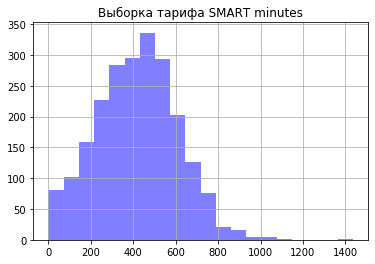

count    2229.000000
mean      417.934948
std       190.313730
min         0.000000
25%       282.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: duration_roundup_sum, dtype: float64


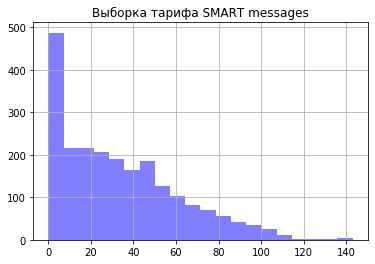

count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: messages_count, dtype: float64


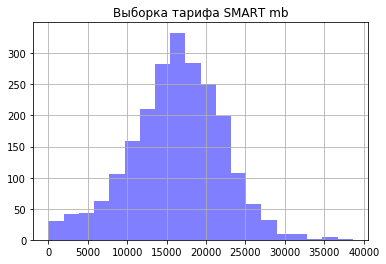

count     2229.000000
mean     16229.188425
std       5877.576978
min          0.000000
25%      12658.000000
50%      16531.000000
75%      20068.000000
max      38610.000000
Name: mb_used_roundup_sum, dtype: float64


In [38]:
#построим гистограммы, опишим распределения

minutes_smart = data_smart['duration_roundup_sum']
messages_smart = data_smart['messages_count']
mb_smart = data_smart['mb_used_roundup_sum']

metrics_smart = [minutes_smart, messages_smart, mb_smart]
metrics_name = ['minutes', 'messages', 'mb']

for metric_name, metric in zip(metrics_name, metrics_smart):
    label = 'Выборка тарифа SMART ' + metric_name
    metric.hist(color='b', alpha = 0.5, bins=20)
    plt.title(label)
    plt.show()
    print(metric.describe())

Гистограммы выборки тарифа SMART по значениям минут и интернета слегка скошенны влево, но в целом распределение больше всего напоминает нормальное. График по сообщениям значительно скошен влево, а у 0 наблюдается пик, предположительно, у клиентов тарифа smart сообщения не пользуются спросом. 

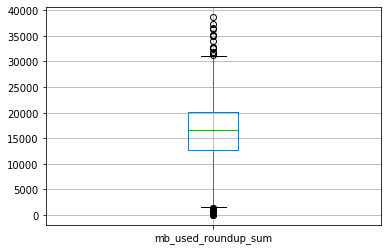

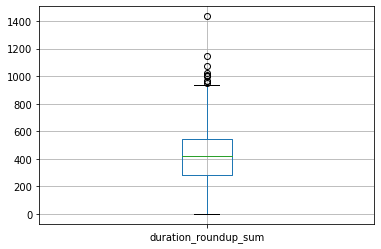

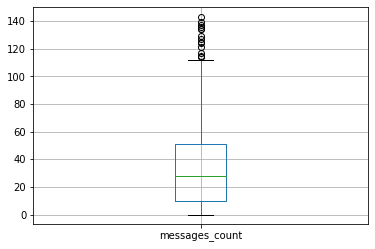

In [39]:
#data_smart.plot(kind='scatter', x='mb_used_roundup_sum', y='revenue')
columns = ['mb_used_roundup_sum', 'duration_roundup_sum', 'messages_count']
for column in columns:
    data_smart.boxplot(column)
    plt.show()

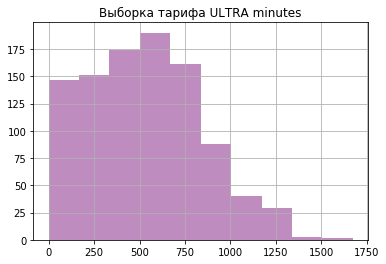

count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: duration_roundup_sum, dtype: float64


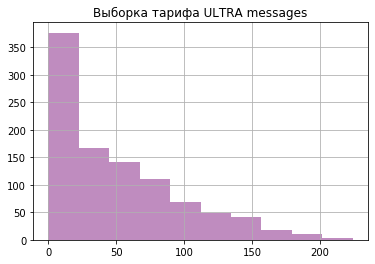

count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: messages_count, dtype: float64


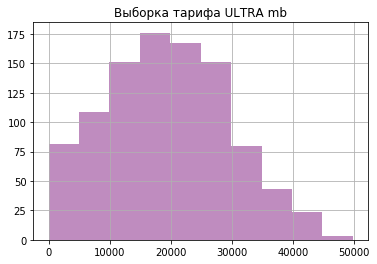

count      985.000000
mean     19486.901523
std      10096.317202
min          0.000000
25%      11785.000000
50%      19324.000000
75%      26863.000000
max      49789.000000
Name: mb_used_roundup_sum, dtype: float64


In [40]:
minutes_ultra = data_ultra['duration_roundup_sum']
messages_ultra = data_ultra['messages_count']
mb_ultra = data_ultra['mb_used_roundup_sum']

metrics_ultra = [minutes_ultra, messages_ultra, mb_ultra]
metrics_name = ['minutes', 'messages', 'mb']

for metric_name, metric in zip(metrics_name, metrics_ultra):
    label = 'Выборка тарифа ULTRA ' + metric_name
    metric.hist(color = (0.5,0.1,0.5,0.6), alpha = 0.5)
    plt.title(label)
    plt.show()
    print(metric.describe())

Гистограммы выборки тарифа ULTRA по значениям минут и интернета слегка скошенны влево, но в целом распределение больше всего напоминает нормальное. График по сообщениям значительно скошен влево, а у 0 наблюдается пик, предположительно, у клиентов тарифа ultra сообщения не пользуются спросом.

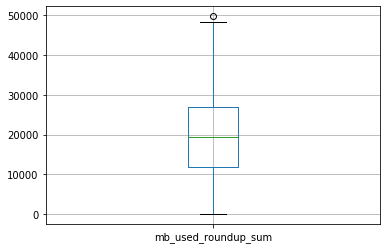

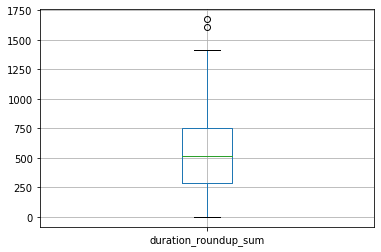

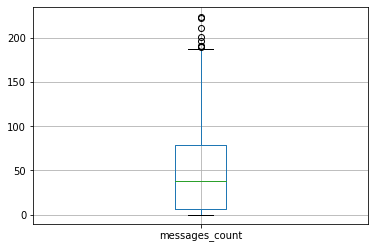

In [41]:
for column in columns:
    data_ultra.boxplot(column)
    plt.show()

Средний пользователь тарифа:
- smart использует 417 минут, 16,2 Гб, 33 СМС и приносит 1275 рублей в месяц.
- ultra использует 526 минут, 19,4 Гб, 49 СМС и приносит 2075 рублей в месяц.

На первый взгляд кажется, что больше денег приносит тариф ultra, но если сравнивать суммарную выручку выборки, то с заметным отрывом выгоднее для компании окажется тариф smart (2,8 млн руб. на тарифе smart против 2 млн руб на тарифе ultra). Эту гипотезу необходимо исследовать.

Гистограммы по значениям минут и интернета слегка скошенны влево, но в целом распределение больше всего напоминает нормальное. График по сообщениям значительно скошен влево, а у 0 наблюдается пик, предположительно, у клиентов сообщения не пользуются значительным спросом, чего нельзя сказать про интернет и звонки.

### 4. Проверим гипотезы

<a id='15-bullet'></a>
#### Действительно ли средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Предположим, что средняя выручка пользователей тарифов "Ультра" и "Смарт" не отличается, это будет наша нулевая гипотеза. Альтернатиной гипотезой будет, что средние выручки тарифов отличаются.

In [42]:
data_ultra_rev = data_ultra['revenue']
data_smart_rev = data_smart['revenue']

alpha = .05

results = st.ttest_ind(data_ultra_rev, data_smart_rev, equal_var=False)
pvalue = results.pvalue

print('Средняя выручка по тарифу ULTRA: {:.7}'.format(data_ultra_rev.mean()))
print('Средняя выручка по тарифу SMART: {:.7}'.format(data_smart_rev.mean()))
print('p-значение: {}'.format(pvalue))

if pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Средняя выручка по тарифу ULTRA: 2071.066
Средняя выручка по тарифу SMART: 1294.639
p-значение: 2.7240946993530856e-246
Отвергаем нулевую гипотезу


Разница средней выручки по тарифам значительная. По имеющимся данным нельзя утверждать, что средняя выручка не отличается и что эта разница могла получиться случайно.

<a id='16-bullet'></a>
#### Действительно ли средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Предположим, что средняя выручка пользоватлей из Москвы равна выручке пользователей из других регионов, это будет наша нулевая гипотеза. Альтернативной гипотезой будет, что они отличаются. Москва занимает большую долю в выборке данных, поэтому исследовать равенство средних для выборки по Москве и регионам кажется логичной идеей.

In [43]:
#проверим для тарифа ultra
moscow_ultra = data_ultra.query('city == "Москва"')['revenue']
region_ultra = data_ultra.query('city != "Москва"')['revenue']

alpha = .05

results = st.ttest_ind(moscow_ultra, region_ultra, equal_var=False)
pvalue = results.pvalue

print('Средняя выручка по Москве тарифа ULTRA: {:.7}'.format(moscow_ultra.mean()))
print('Средняя выручка по регионам тарифа ULTRA: {:.7}'.format(region_ultra.mean()))
print('p-значение: {:.5}'.format(pvalue))

if pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Средняя выручка по Москве тарифа ULTRA: 2075.333
Средняя выручка по регионам тарифа ULTRA: 2069.803
p-значение: 0.84009
Не удалось отвергнуть нулевую гипотезу


In [44]:
#проверим для тарифа smart
moscow_smart = data_smart.query('city == "Москва"')['revenue']
region_smart = data_smart.query('city != "Москва"')['revenue']

alpha = .05

results = st.ttest_ind(moscow_smart, region_smart, equal_var=False)
pvalue = results.pvalue

print('Средняя выручка по Москве тарифа SMART: {:.7}'.format(moscow_smart.mean()))
print('Средняя выручка по регионам тарифа SMART: {:.7}'.format(region_smart.mean()))
print('p-значение: {:.5}'.format(pvalue))

if pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Средняя выручка по Москве тарифа SMART: 1245.057
Средняя выручка по регионам тарифа SMART: 1305.024
p-значение: 0.16424
Не удалось отвергнуть нулевую гипотезу


In [45]:
#проверим по всему датасету
moscow = data.query('city == "Москва"')['revenue']
region = data.query('city != "Москва"')['revenue']

alpha = .05

results = st.ttest_ind(moscow, region, equal_var=False)
pvalue = results.pvalue

print('Средняя выручка по Москве: {:.7}'.format(moscow.mean()))
print('Средняя выручка по регионам: {:.7}'.format(region.mean()))
print('p-значение: {:.5}'.format(pvalue))

if pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Средняя выручка по Москве: 1550.805
Средняя выручка по регионам: 1528.317
p-значение: 0.51266
Не удалось отвергнуть нулевую гипотезу


Несмотря на отклонения средней выручки в данных по обоим тарифам и целому датасету мы не смогли отвергнуть нулевую гипотезу.
Это означает, что по имеющимся данным с вероятностью в 48% такое или большее различие можно получить случайно.

### 5. Заключение

<a id='17-bullet'></a>
#### Общий вывод

1. Средний пользователь тарифа:
    - smart использует 417 минут, 16,2 Гб, 33 СМС и приносит 1295 рублей в месяц.
    - ultra использует 526 минут, 19,4 Гб, 49 СМС и приносит 2071 рублей в месяц.


2. У клиентов всех тарифов сообщения не пользуются значительным спросом, чего нельзя сказать про интернет и звонки.


3. Разница средней выручки по тарифам значительная (ULTRA 2071 руб/мес, SMART 1295 руб/мес). По имеющимся данным нельзя утверждать, что средняя выручка не отличается и что эта разница могла получиться случайно.


4. Несмотря на отклонения средней выручки пользователей Москвы (1551 руб/мес) и регионов (1528 руб/мес) в данных отдельно по тарифам и данных по выборке их всех тарифов мы не смогли отвергнуть нулевую гипотезу. Это означает, что по имеющимся данным с вероятностью в 48% такое или большее различие можно получить случайно.


5. По данным текущей выборки можно сказать, что на одного пользователя безусловно выгоднее тариф ULTRA (средняя выручка 2071 руб/мес), но вероятно, таких пользователей в принципе не так много и менее дорогостоящий тариф SMART (средняя выручка 1295 руб/мес) позволит получить больше клиентов.